<a id='home'></a>
# Project 5: Communicate Data Findings


### Table of Contents
<ul>
<li><a href="#intro">0. Introduction</a></li>.
    
<li><a href="#Gathering">1. GATHERING</a></li>
<li><a href="#assessment">2. ASSESSMENT</a></li>
<li><a href="#Actions"> i. Assessment Actions</a></li>.
    
<li><a href="#cleaning">3. CLEANING</a></li>
<li><a href="#C-QUALITY">i. Quality</a></li>.
    
<li><a href="#analysing"> 4. ANALYSING & VISUALISATION</a></li>
<li><a href="#univariate"> i. Univariate analysis</a></li>
<li><a href="#bivariate"> ii. Bivariate analysis</a></li>
<li><a href="#multivariate"> iii. Multivariate analysis</a></li>
    
</ul>

<a id='intro'></a>
### Introduction

For this project I will be analysing what was formerly known as Ford GoBike bicycle sharing system data, this was rebranded to Bay Wheels in June 2019 after an acquisition by Lyft.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

**NOTE:** 
*At the time of starting this project the data from the Ford GoBike site had data up until August 2020 so all calculations are based on the fact that 2020 is not a full year.*


<a id='wrangling'></a>
## 1. DATA WRANGLING:  Gathering,  Assessing & Cleaning

<a id='Gathering'></a>

## <font color ='purple'> 1. Gathering >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [60]:
# import relevant libraries into Jupyter Notebooks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import time
import datetime
import haversine

In [2]:
# gather ('read in') all 4 years monthly csv files
df_Ford_Go_Bike_2017_2020_Master  = pd.concat(map(pd.read_csv, ['2017-fordgobike-tripdata.csv', '201801-fordgobike-tripdata.csv', '201802-fordgobike-tripdata.csv','201803-fordgobike-tripdata.csv',
'201804-fordgobike-tripdata.csv', '201805-fordgobike-tripdata.csv', '201806-fordgobike-tripdata.csv', '201807-fordgobike-tripdata.csv', '201808-fordgobike-tripdata.csv', 
'201809-fordgobike-tripdata.csv', '201810-fordgobike-tripdata.csv', '201811-fordgobike-tripdata.csv', '201812-fordgobike-tripdata.csv', '201901-fordgobike-tripdata.csv', '201902-fordgobike-tripdata.csv','201903-fordgobike-tripdata.csv',
'201904-fordgobike-tripdata.csv', '201905-fordgobike-tripdata.csv', '201906-fordgobike-tripdata.csv', '201907-fordgobike-tripdata.csv', '201908-fordgobike-tripdata.csv', 
'201909-fordgobike-tripdata.csv', '201910-fordgobike-tripdata.csv', '201911-fordgobike-tripdata.csv', '201912-fordgobike-tripdata.csv', '202001-fordgobike-tripdata.csv', '202002-fordgobike-tripdata.csv','202003-fordgobike-tripdata.csv',
'202004-fordgobike-tripdata.csv', '202005-fordgobike-tripdata.csv', '202006-fordgobike-tripdata.csv', '202007-fordgobike-tripdata.csv', '202008-fordgobike-tripdata.csv']))
print(df_Ford_Go_Bike_2017_2020_Master.shape)  

C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(6483502, 25)


In [4]:
df_Ford_Go_Bike_2017_2020_Master.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,80110.0,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78800.0,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45768.0,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_Ford_Go_Bike_2017_2020_Master.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
152443,NaN,NaN,NaN,6.0,The Embarcadero at Sansome St,NaN,NaN,55.0,Webster St at Grove St,NaN,...,0A311A0C11734D12,docked_bike,2020-08-31 16:13:51,2020-08-31 16:39:26,37.804770,-122.403234,37.777053,-122.429558,casual,NaN
152444,NaN,NaN,NaN,193.0,Grand Ave at Santa Clara Ave,NaN,NaN,181.0,Grand Ave at Webster St,NaN,...,7BCDDF222BC26B8F,docked_bike,2020-08-01 15:04:57,2020-08-01 15:14:48,37.812744,-122.247215,37.811377,-122.265192,casual,NaN
152445,NaN,NaN,NaN,75.0,Market St at Franklin St,NaN,NaN,20.0,Mechanics Monument Plaza (Market St at Bush St),NaN,...,5C55192D0B6734BA,docked_bike,2020-08-07 19:44:44,2020-08-07 20:06:49,37.773793,-122.421239,37.791300,-122.399051,casual,NaN


<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

<a id='assessment'></a>
## <font color = 'purple'> 2. Assessment >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

#### <font color='blue'> 1. BREAKDOWN OF DATA TYPES

In [3]:
# 01 - returns breakdown of the data types within the dataset and any anomalies i.e. int, string, any null values)    
df_Ford_Go_Bike_2017_2020_Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6483502 entries, 0 to 152445
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
 15  ride_id                  object 
 16  rideable_type            object 
 17  started_at               object 
 18  ended_at                 object 
 19  start_lat                float64
 20  start_lng                float64
 21  end_lat  

***Observations:***
* `Start_time` and `end_time` are objects 
* `user_type` is an object





<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>    

#### <font color='blue'> 2. UNIQUE VALUES OF DATA: 2017 - YT Aug 2020

#### <font color ='green'> 2017

In [7]:
# 02 - returns the number of unique values in each column 
df_Ford_Go_Bike_2017_2020_Master.nunique()

duration_sec                 25768
start_time                 5733641
end_time                   5733322
start_station_id               481
start_station_name             522
start_station_latitude      319558
start_station_longitude     339276
end_station_id                 482
end_station_name               523
end_station_latitude        322439
end_station_longitude       343148
bike_id                      15996
user_type                        2
bike_share_for_all_trip          2
rental_access_method             2
ride_id                     688091
rideable_type                    2
started_at                  655929
ended_at                    655000
start_lat                    99776
start_lng                   107482
end_lat                     102917
end_lng                     110785
member_casual                    2
is_equity                        2
dtype: int64

***Observations:***
* There is a mismatch in the number of unique entries e.g. `start_station_id` has 481 entries and `start_station_name` has 522, these should be the same
* There are sim,iliar indifferences for several other columns



<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>    

#### <font color='blue'> 3. LIST OF ROWS WHERE DATA IS DUPLICATED: 2017 - YT Aug 2020

In [8]:
# 3 - high-level overview of rows that are duplicated

Master = sum(df_Ford_Go_Bike_2017_2020_Master.duplicated())
print("Duplicate rows = {:,}".format(Master))


Duplicate rows = 7,512


***Observations:***
* There are 7,512 duplicate rows in the df



<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>    

#### <font color='blue'> 4. HIGH LEVEL OVERVIEW: ANY MISSING DATA: 2017 - YT Aug 2020

In [9]:
# 04 - returns True or False if there are any missing data  

Master_Missing_Data = (df_Ford_Go_Bike_2017_2020_Master.isna().any().any())
print("Missing Data = {}".format(Master_Missing_Data))

Missing Data = True


***Observations:***
* There are missing entries in the df



<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>    

#### <font color='blue'> 5. HIGH LEVEL OVERVIEW: TOTAL SUM OF ANY MISSING DATA: 2017 - YT Aug 2020

In [10]:
# 05 - sums the total of missing data cells

Sum_Missing_Data = df_Ford_Go_Bike_2017_2020_Master.isna().sum().sum()
print("Sum of missing details (null values)  = {:,}".format(Sum_Missing_Data))

Sum of missing details (null values)  = 76,102,320


In [11]:
# returns all the sum of null values within each variable (column)
df_Ford_Go_Bike_2017_2020_Master.isnull().sum()

duration_sec                688091
start_time                  688091
end_time                    688091
start_station_id            820134
start_station_name          818300
start_station_latitude      688091
start_station_longitude     688091
end_station_id              833002
end_station_name            831176
end_station_latitude        688091
end_station_longitude       688091
bike_id                     688091
user_type                   688091
bike_share_for_all_trip    2356057
rental_access_method       5744806
ride_id                    5795411
rideable_type              5795411
started_at                 5795411
ended_at                   5795411
start_lat                  5795411
start_lng                  5795411
end_lat                    5796449
end_lng                    5796449
member_casual              5795411
is_equity                  6345251
dtype: int64

In [14]:
# checking the columns with NO null values
not_null_columns=df_Ford_Go_Bike_2017_2020_Master.columns[df_Ford_Go_Bike_2017_2020_Master.notnull().any()]
df_Ford_Go_Bike_2017_2020_Master[not_null_columns].notnull().sum()

duration_sec               5795411
start_time                 5795411
end_time                   5795411
start_station_id           5663368
start_station_name         5665202
start_station_latitude     5795411
start_station_longitude    5795411
end_station_id             5650500
end_station_name           5652326
end_station_latitude       5795411
end_station_longitude      5795411
bike_id                    5795411
user_type                  5795411
bike_share_for_all_trip    4127445
rental_access_method        738696
ride_id                     688091
rideable_type               688091
started_at                  688091
ended_at                    688091
start_lat                   688091
start_lng                   688091
end_lat                     687053
end_lng                     687053
member_casual               688091
is_equity                   138251
dtype: int64

***Observations:***
* There are over 76k missing entries in total
* From  `bike_share_for_all_trip` to `is_equity` there are  there are less than 74k entires that are NOT null values, whereas from `duration_sec` to `user_type` there are over 560k
*



<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>    

#### <font color='blue'> 6. STATISTICS SUMMARY

In [4]:
# 06 - returns statistics data summary (describes full breakdown of data into
# count, mean, Std Dev, percentile etc)
df_Ford_Go_Bike_2017_2020_Master.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,start_lat,start_lng,end_lat,end_lng
count,5.795411e+06,5.663368e+06,5.795411e+06,5.795411e+06,5.650500e+06,5.795411e+06,5.795411e+06,5.795411e+06,688091.000000,688091.000000,687053.000000,687053.000000
mean,8.496090e+02,1.413310e+02,3.776353e+01,-1.223520e+02,1.380362e+02,3.776315e+01,-1.223497e+02,6.687199e+04,37.726157,-122.348618,37.726114,-122.346681
std,2.233872e+03,1.235947e+02,1.434050e-01,3.410302e-01,1.227563e+02,2.011897e-01,5.704336e-01,1.863825e+05,0.146684,0.176975,0.153650,0.449651
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225758e+02,4.000000e+00,37.239200,-122.514300,0.000000,-122.559000
25%,3.600000e+02,4.300000e+01,3.776971e+01,-1.224136e+02,3.600000e+01,3.777003e+01,-1.224117e+02,1.640000e+03,37.760000,-122.432590,37.760000,-122.432400
50%,5.720000e+02,9.800000e+01,3.778053e+01,-1.223989e+02,9.600000e+01,3.778079e+01,-1.223984e+02,3.159000e+03,37.773600,-122.412083,37.773539,-122.412000
75%,8.930000e+02,2.230000e+02,3.779539e+01,-1.223881e+02,2.130000e+02,3.779539e+01,-1.223881e+02,9.600000e+03,37.787700,-122.390925,37.788100,-122.391000
max,9.121100e+05,5.380000e+02,4.551000e+01,0.000000e+00,5.380000e+02,4.551000e+01,0.000000e+00,9.999600e+05,37.880222,-121.770000,37.962100,0.000000




<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>    

<a id='Actions'></a>
 ## <font color='green'>Initial Assessment Actions


> #### <font color='green'> Quality *(Completeness, Validity, Accuracy & Consistency)*
#### Based on my oberservations of the inital dataset I intend to complete the following actions: 
1. Convert `start_time` and `end_time` from objects to ***datetime*** type 
* Remove the variables that are not required based on them having too many missing entries
* Remove all nulls from the df 

> #### <font color='green'> Tidiness *(Structural)*
**Note:** I found no structural elements with all four datasets that need addressing
    





<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

<a id='cleaning'></a>
## <font color = 'purple'> 3. Cleaning >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [35]:
# import relevant libraries just for Cleaning phase
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from numpy import cos, sin, arcsin, sqrt
from math import radians

<font color='orange'> ***Create new version for reference***

In [36]:
# create a 'clean' copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN = df_Ford_Go_Bike_2017_2020_Master.copy()

<a id='C-QUALITY'></a>
#### <font color ='blue'> **QUALITY ACTIONS**


**ACTION 1.** =============================================================================================================

#### <font color='green'> Define


Convert `start_time` and `end_time` from objects to ***datetime*** type 

#### `start_time`

> #### <font color='green'> Code

In [37]:
# converts [start_time] to datetime type 
df_Ford_Go_Bike_2017_2020_Master_CLEAN.start_time = pd.to_datetime(df_Ford_Go_Bike_2017_2020_Master_CLEAN.start_time)

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


> #### <font color='green'> Test

In [38]:
# should return datetime dtype for [start_time] 
df_Ford_Go_Bike_2017_2020_Master_CLEAN.dtypes

duration_sec                      float64
start_time                 datetime64[ns]
end_time                           object
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                           float64
user_type                          object
bike_share_for_all_trip            object
rental_access_method               object
ride_id                            object
rideable_type                      object
started_at                         object
ended_at                           object
start_lat                         float64
start_lng                         float64
end_lat                           float64
end_lng                           float64
member_casual                     

#### `end_time`

> #### <font color='green'> Code

In [39]:
# converts [end_time] to datetime type 
df_Ford_Go_Bike_2017_2020_Master_CLEAN.end_time = pd.to_datetime(df_Ford_Go_Bike_2017_2020_Master_CLEAN.end_time)

> #### <font color='green'> Test

In [40]:
# should return datetime dtype for [end_time] 
df_Ford_Go_Bike_2017_2020_Master_CLEAN.dtypes

duration_sec                      float64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                           float64
user_type                          object
bike_share_for_all_trip            object
rental_access_method               object
ride_id                            object
rideable_type                      object
started_at                         object
ended_at                           object
start_lat                         float64
start_lng                         float64
end_lat                           float64
end_lng                           float64
member_casual                     

**<font color ='blue'>Action 1. completed:** Both `start_time` and `end_time` columns have been converted to datetime types


<li><a  href="#Actions">Go to Actions List</a></li>

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

<font color='orange'> ***Create new version for reference***

In [41]:
# create a 'clean' copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v2 = df_Ford_Go_Bike_2017_2020_Master_CLEAN.copy()

**ACTION 2.** =============================================================================================================

#### <font color='green'> Define


Remove the variables that are not required based on them having too many missing entries
`bike_share_for_all_trip`, `rental_access_method`, `ride_id`, `rideable_type`, `started_at`, `ended_at`, `start_lat`, `start_lng`, `end_lat`, `end_lng`, `member_casual`, `is_equity`                                    

#### <font color='green'> Code

In [42]:
# Removes columns from ID 13 onwards 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v2 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v2.drop(['bike_share_for_all_trip','rental_access_method', 'ride_id', 'rideable_type'
, 'started_at', 'ended_at', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'is_equity'],axis=1)

#### <font color='green'> Test

In [43]:
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6483502 entries, 0 to 152445
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  float64       
 12  user_type                object        
dtypes: datetime64[ns](2), float64(8), object(3)
memory usage: 692.5+ MB


**<font color ='blue'>Action 2. completed:** All the not required columns have been removed


<li><a  href="#Actions">Go to Actions List</a></li>

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

<font color='orange'> ***Create new version for reference***

In [44]:
# create a 'clean' copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v2.copy()

**ACTION 3.** =============================================================================================================

#### <font color='green'> Define

Remove all nulls from the df

In [45]:
# check how many null values in df
Master_Null_Data = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3.isna().sum().sum()
print("Number of null values in df = {:,}".format(Master_Null_Data))

Number of null values in df = 9,495,431


#### <font color='green'> Code

In [46]:
# removes all null vales in any row
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3.dropna(how='any',axis=0) 

#### <font color='green'> Test

In [47]:
# should return False is there are no null values in df
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3.isnull().any().any()

False

In [48]:
# final check to confirm df has no null values
Master_Null_Data = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3.isna().sum().sum()
print("Number of null values in df = {:,}".format(Master_Null_Data))

Number of null values in df = 0


**<font color ='blue'>Action 3. completed:** all nulls have been removed from the df

<font color='orange'> ***Create new version for reference***

In [49]:
# create a 'clean' copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3.copy()

<li><a  href="#Actions">Go to Actions List</a></li>

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

### <font color ="blue"> Additional Actions (AA)

The following additional actions are to facilitate the ploting of charts, graphs etc for the visualisation of the data.

#### <font color='green'> Define - AA.1
   

Create additional columns for **min**, **hour**, **day of week**, **month** and **year**.  This will enable enhanced functionality to filter the data and aid in plotting visuals.

#### <font color='green'> Code

In [50]:
# creates additional min, hour, week, month and year columns from the [start_time_ variable]
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['duration_min'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['duration_sec']/60
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_hour'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_time'].dt.hour
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_day_of_week'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_time'].dt.strftime('%a')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_month'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_time'].dt.strftime('%B')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['year'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_time'].dt.strftime('%Y')

#### <font color='green'> Test

In [51]:
# returns additional time and date variables
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5124358 entries, 0 to 174729
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  float64       
 12  user_type                object        
 13  duration_min             float64       
 14  start_hour               int64         
 15  start_day_of_week        object        
 16  start_month              object        
 17  year                     obj

**<font color ='blue'>Action AA.1. completed:** New columns for  **minute**, **hour**, **day of week**, **month** and **year** has been created on the `start_time` variable

<li><a  href="#Actions">Go to Actions List</a></li>

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

#### <font color='green'> Define - AA.2
   

In order to utilise the longitude and latitude columns I will create an additional column for `distance_km`, this would make it easier to calculate distances between stations.

#### <font color='green'> Code

In [63]:
# Calculating distance using vectorized operations (far quicker)
# source: https://stackoverflow.com/questions/25767596/vectorised-haversine-formula-with-a-pandas-dataframe

def haversine(lon1, lat1, lon2, lat2):
    '''Vectorized Distance Function
    inputs: lon/lat pair of origin
            lon/lat pair of destination
    output: distance, in km, between locations'''
    
    lon1, lat1, lon2, lat2=map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km
    
# create distancevariable, i.e. call distance function on pairs of lon/lat geocoordinates
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['distance_km'] = haversine(df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_station_longitude'],
                                    df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_station_latitude'],
                                    df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['end_station_longitude'],     
                                    df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['end_station_latitude'])


#### <font color='green'> Test

In [64]:
# returns newly created column for [distance_km] variable
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5124358 entries, 0 to 174729
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  float64       
 12  user_type                object        
 13  duration_min             float64       
 14  start_hour               int64         
 15  start_day_of_week        object        
 16  start_month              object        
 17  year                     obj

**<font color ='blue'>Action AA.2 completed:** A `distance_km` column has been created

<li><a  href="#Actions">Go to Actions List</a></li>

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

In [65]:
# check additional columns have been created
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5124358 entries, 0 to 174729
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  float64       
 12  user_type                object        
 13  duration_min             float64       
 14  start_hour               int64         
 15  start_day_of_week        object        
 16  start_month              object        
 17  year                     obj

#### <font color='green'> Define  AA.3
   

Convert ID columns [12] & [14] - [17] from object to *categorical* types

#### <font color='green'> Code

In [66]:
# converts variables [user_type], [start_hour], [start_week], [start_month] & [year] to categorical type 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['user_type']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['user_type'].astype('category')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_hour']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_hour'].astype('category')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_day_of_week']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_day_of_week'].astype('category')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_month']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_month'].astype('category')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['year']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['year'].astype('category')

#### <font color='green'> Test

In [67]:
# returns categorical types for ID columns [12] & [14] - [17] 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4.dtypes

duration_sec                      float64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                           float64
user_type                        category
duration_min                      float64
start_hour                       category
start_day_of_week                category
start_month                      category
year                             category
distance_km                       float64
dtype: object

**<font color ='blue'>Action AA.3. completed:** Columns [12] & [14] - [17] have been converted from object to *categorical* types

<li><a  href="#Actions">Go to Actions List</a></li>

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

In [68]:
# final check if any null values in df before create new version
Master_Null_Data = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4.isna().sum().sum()
print("Number of null values in df = {:,}".format(Master_Null_Data))

Number of null values in df = 0


<font color='orange'> ***Create new version for reference***

In [69]:
# create a 'clean' copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4.copy()

<a id='analysing'></a>
## <font color ='purple'> 4. Analysis & Visualisation >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

#### <font color='green'> Structure of  dataset

> After cleaning the dataset the amened dataframe contains **5,124,358** entries and **18** columns, originally there was 6,483,502 and 24 columns.

> The structure is as follows:
1.    **duration_sec** - *Trip Duration (seconds)*       
*    **start_time** - *Start Time and Date
*   **end_time** - End Time and Date
*   **start_station_id** - Start Station ID    
*   **start_station_name** - Start Station Name        
*   **start_station_latitude** - Start Station Latitude       
*   **start_station_longitude** - Start Station Longitude        
*   **end_station_id** - End station ID                  
*   **end_station_name** - End station Name             
*   **end_station_latitude** - End station Latitude          
*  **end_station_longitude** - End station Longitude        
*  **bike_id** - Bike ID                      
*  **user_type** - User Type (Customer or Subscriber)                     
*  **duration_min** - Trip Duration (mins)                  
*  **start_hour** - Start Time by Hour                       
*  **start_day_of_week** - Start Day of the Week             
*  **start_month** - Start Month                   
*  **year** - Year of Trip                         
*  **distance_km** - Distance (km)                  


#### <font color='green'> Main feature(s) of interest in dataset?

> The main features of interest are:
  * timings of the rides
  * how far users travel  
  * locations
  * types of users


#### <font color='green'> Features in the dataset that will help support  investigation into  feature(s) of interest?

> 1. Duration (mins)
* Distance
* Start Hour
* Start Month
* Year
* User Type
* Start and End Stations

### <font color ='blue'> Exploratory Analysis

In [38]:
# returns summary stats based on final df
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,duration_min,distance_km
count,5.124358e+06,5.124358e+06,5.124358e+06,5.124358e+06,5.124358e+06,5.124358e+06,5.124358e+06,5.124358e+06,5.124358e+06,5.124358e+06
mean,8.538768e+02,1.334690e+02,3.777004e+01,-1.223551e+02,1.304309e+02,3.776949e+01,-1.223521e+02,1.159440e+04,1.423128e+01,1.895664e+00
std,2.273826e+03,1.149394e+02,9.969579e-02,1.382182e-01,1.142143e+02,1.921373e-01,5.498473e-01,6.865985e+04,3.789710e+01,5.628132e+01
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225091e+02,3.000000e+00,0.000000e+00,-1.225091e+02,4.000000e+00,1.000000e+00,0.000000e+00
25%,3.580000e+02,3.900000e+01,3.777041e+01,-1.224119e+02,3.300000e+01,3.777106e+01,-1.224113e+02,1.465000e+03,5.966667e+00,8.999319e-01
50%,5.670000e+02,9.500000e+01,3.778101e+01,-1.223983e+02,9.200000e+01,3.778107e+01,-1.223974e+02,2.826000e+03,9.450000e+00,1.412757e+00
75%,8.850000e+02,2.060000e+02,3.779581e+01,-1.222948e+02,2.000000e+02,3.779639e+01,-1.222948e+02,5.001000e+03,1.475000e+01,2.167595e+00
max,8.636900e+04,5.210000e+02,4.551000e+01,0.000000e+00,5.210000e+02,4.551000e+01,0.000000e+00,9.989160e+05,1.439483e+03,1.280989e+04


<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

<a id='univariate'></a>
### <font color ="purple"> UNIVARIATE EXPLORATION

**Hourly breakdown of Bike Hires**

In [79]:
# returns total hours of bike hires
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.start_hour.count()

5124358

In [39]:
# returns totals for start hour
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.groupby(['start_hour']).count()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_day_of_week,start_month,year,distance_km
start_hour,,,,,,,,,,,,,,,,,,
0,28357,28357,28357,28357,28357,28357,28357,28357,28357,28357,28357,28357,28357,28357,28357,28357,28357,28357
1,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441
2,10467,10467,10467,10467,10467,10467,10467,10467,10467,10467,10467,10467,10467,10467,10467,10467,10467,10467
3,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363
4,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131,7131
5,26820,26820,26820,26820,26820,26820,26820,26820,26820,26820,26820,26820,26820,26820,26820,26820,26820,26820
6,103563,103563,103563,103563,103563,103563,103563,103563,103563,103563,103563,103563,103563,103563,103563,103563,103563,103563
7,284480,284480,284480,284480,284480,284480,284480,284480,284480,284480,284480,284480,284480,284480,284480,284480,284480,284480
8,575912,575912,575912,575912,575912,575912,575912,575912,575912,575912,575912,575912,575912,575912,575912,575912,575912,575912


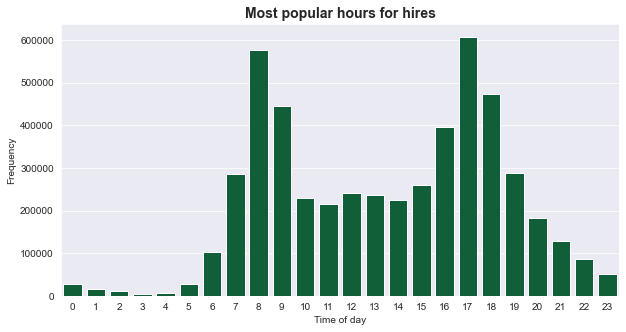

In [40]:
# returns most popular count for hours of day
plt.rcParams['figure.figsize'] = 10, 5
base_color = sns.color_palette('YlGn_r')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='start_hour', color=base_color);
plt.title('Most popular hours for hires', weight='bold').set_fontsize('14')
plt.xlabel('Time of day');
plt.ylabel('Frequency');

***Comment(s):*** There is a clear distinction in morning and evening rides, this infers that the majority of users are people going to and from work as circa 57k users hire a bike at 08:00 and circa 60+k users hire a bike at 17:00.  

Next I will analyse daily breakdown of bike hires.

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

**Daily breakdown of Bike Hires**

In [41]:
# Convert the start_day_of_week to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['start_day_of_week'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['start_day_of_week'].astype(ordered_weekdays)


In [42]:
# returns count for days of week 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.groupby(['start_day_of_week']).count()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_hour,start_month,year,distance_km
start_day_of_week,,,,,,,,,,,,,,,,,,
Mon,809059,809059,809059,809059,809059,809059,809059,809059,809059,809059,809059,809059,809059,809059,809059,809059,809059,809059
Tue,873189,873189,873189,873189,873189,873189,873189,873189,873189,873189,873189,873189,873189,873189,873189,873189,873189,873189
Wed,863477,863477,863477,863477,863477,863477,863477,863477,863477,863477,863477,863477,863477,863477,863477,863477,863477,863477
Thu,866717,866717,866717,866717,866717,866717,866717,866717,866717,866717,866717,866717,866717,866717,866717,866717,866717,866717
Fri,808522,808522,808522,808522,808522,808522,808522,808522,808522,808522,808522,808522,808522,808522,808522,808522,808522,808522
Sat,477273,477273,477273,477273,477273,477273,477273,477273,477273,477273,477273,477273,477273,477273,477273,477273,477273,477273
Sun,426121,426121,426121,426121,426121,426121,426121,426121,426121,426121,426121,426121,426121,426121,426121,426121,426121,426121


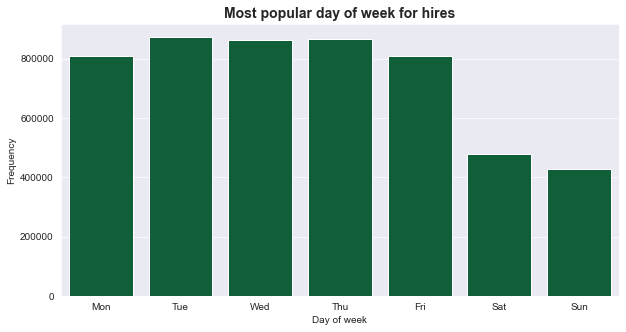

In [43]:
# Most popular day of the week for hiring bikes
plt.rcParams['figure.figsize'] = 10, 5
base_color = sns.color_palette('YlGn_r')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='start_day_of_week', color=base_color);
plt.title('Most popular day of week for hires', weight='bold').set_fontsize('14')
plt.xlabel('Day of week');
plt.ylabel('Frequency');

***Comment(s):*** The above chart further reinforces my assumption that the highest users are work commuters as the bikes have circa 30k more hires Mon - Fri than the weekend, Tuesday and Thursday being hte most popular days. 

Next I will analyse monthly breakdown of bike hires.

**Monthly breakdown of Bike Hires**

In [44]:
# Convert the start_month to ordinal variables.
months = ['January','February','March','April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_months = pd.api.types.CategoricalDtype(ordered = True, categories = months)
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['start_month'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['start_month'].astype(ordered_months)

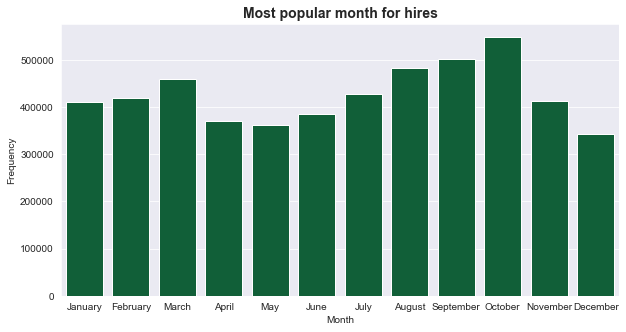

In [45]:
# Breakdown by month
plt.rcParams['figure.figsize'] = 10, 5
base_color = sns.color_palette('YlGn_r')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='start_month', color=base_color);
plt.title('Most popular month for hires', weight='bold').set_fontsize('14')
plt.xlabel('Month');
plt.ylabel('Frequency');

***Comment(s):*** Most popular months for hires is October with over 55k closely followed by September.  The least popular is December which isn't surprising given that the majority of users would be on holidays. 

Next I will analyse yearly breakdown of bike hires.

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

**Yearly breakdown of Bike Hires from 2017 Aug 2020**

In [46]:
# returns count in years
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.groupby(['year']).count()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_hour,start_day_of_week,start_month,distance_km
year,,,,,,,,,,,,,,,,,,
2017,519700,519700,519700,519700,519700,519700,519700,519700,519700,519700,519700,519700,519700,519700,519700,519700,519700,519700
2018,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950,1851950
2019,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259,2407259
2020,345449,345449,345449,345449,345449,345449,345449,345449,345449,345449,345449,345449,345449,345449,345449,345449,345449,345449


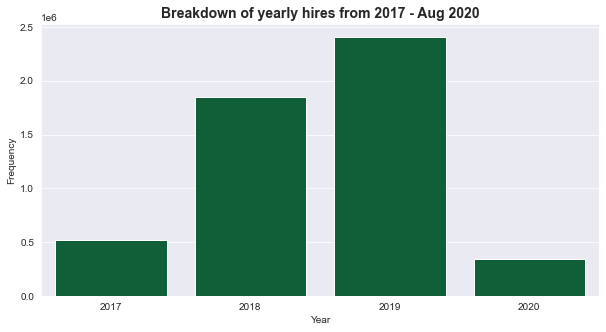

In [47]:
# Breakdown by year
plt.rcParams['figure.figsize'] = 10, 5
base_color = sns.color_palette('YlGn_r')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='year', color=base_color);
plt.title('Breakdown of yearly hires from 2017 - Aug 2020', weight='bold').set_fontsize('14')
plt.xlabel('Year');
plt.ylabel('Frequency');

***Comment(s):*** There has been a steady increase in bike hires from 2017 onwards rising to a peak of over 2.4m hires in 2019.  ALthough it would appear that 2020 is going to be less than 2019 even taking into account that the data is derived upto August with only 4 months to go until the end of the year.  

Next I will analyse the top 5 most popular starting stations.

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

**Breakdown of Top 5 popular starting stations**

In [48]:
# Most Popular Top 5 Starting Stations
df_top_start_stations = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['start_station_name'].value_counts()[:5]
df_top_start_stations

Market St at 10th St                                         97536
San Francisco Ferry Building (Harry Bridges Plaza)           96082
San Francisco Caltrain (Townsend St at 4th St)               93864
Berry St at 4th St                                           91999
San Francisco Caltrain Station 2  (Townsend St at 4th St)    85942
Name: start_station_name, dtype: int64

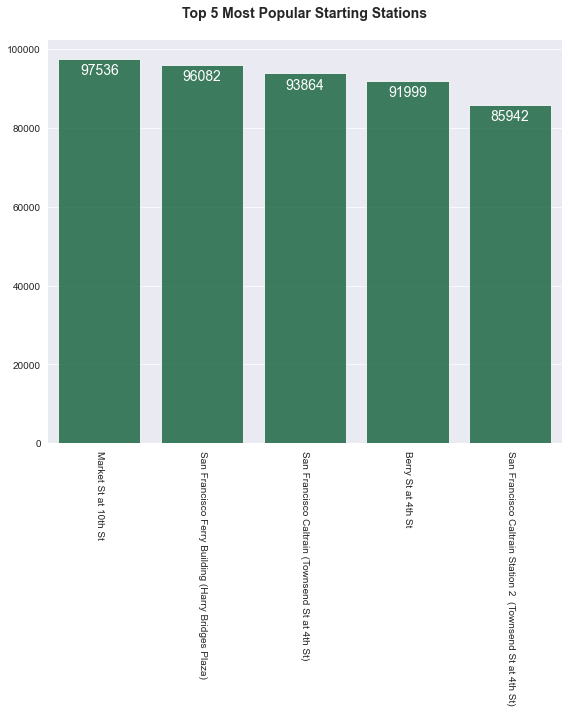

In [49]:
# Most Popular Top 5 Starting Stations
fig, ax = plt.subplots(figsize = (8,10))
sns.barplot(df_top_start_stations.index, df_top_start_stations.values, alpha=.8, color = sns.color_palette("YlGn_r")[0])

# Add annotation for each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x()+p.get_width()/2, p.get_height()-4000), 
                color = "white", size=14, ha='center')

sns.despine(fig, left = True)

# Add title
plt.title('Top 5 Most Popular Starting Stations\n', weight='bold', size=14)
# Rotate x label
plt.xticks(rotation=-90)
plt.tight_layout();

**Comments:** Market St at 100th St is the most popular starting station.  

Next I will analyse the top 5 most popular ending stations.

**Breakdown of Top 5 popular ending stations**

In [50]:
# Most Popular Starting Stations
df_top_end_stations = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['end_station_name'].value_counts()[:5]
df_top_end_stations

San Francisco Caltrain (Townsend St at 4th St)               121848
San Francisco Caltrain Station 2  (Townsend St at 4th St)    115451
San Francisco Ferry Building (Harry Bridges Plaza)           114605
Montgomery St BART Station (Market St at 2nd St)             103881
Market St at 10th St                                          95554
Name: end_station_name, dtype: int64

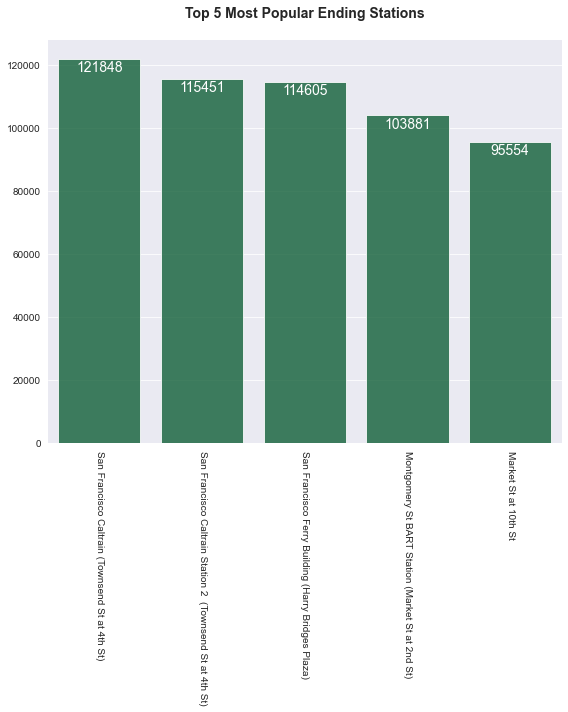

In [51]:
# Plotting the 
fig, ax = plt.subplots(figsize = (8,10))
sns.barplot(df_top_end_stations.index, df_top_end_stations.values, alpha=.8, color = sns.color_palette("YlGn_r")[0])

# Add annotation for each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x()+p.get_width()/2, p.get_height()-4000), 
                color = "white", size=14, ha='center')

sns.despine(fig, left = True)

# Add title
plt.title('Top 5 Most Popular Ending Stations\n', weight='bold', size=14)
# Rotate x label
plt.xticks(rotation=-90)
plt.tight_layout();

**Comments:** San Francisco Caltrain (Townsend St at 4th St) is the most popular ending station.  

Next I will analyse ride hire duration.

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

**Breakdown of ride hire duration**

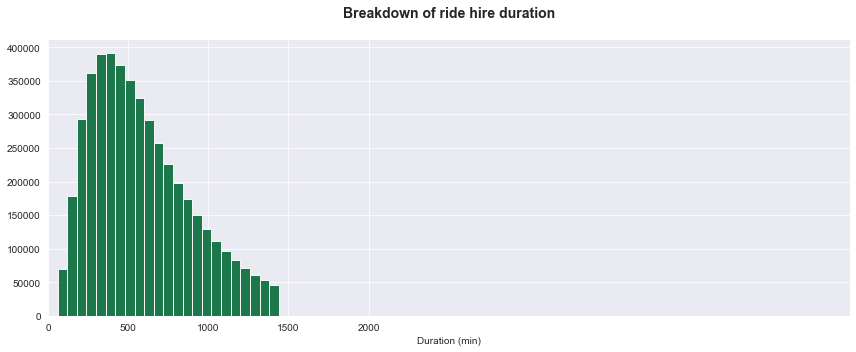

In [52]:
# Set bin size and color
bin_size = 60
bins = np.arange(0, df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.duration_min.max()+bin_size, bin_size)
color = sns.color_palette('YlGn_r')[0]

# Plotting
fig, axes = plt.subplots(figsize = (12,5))
plt.hist(df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.duration_sec, bins = bins, color= color, alpha=0.9);

# formatting
plt.xticks(ticks = [x for x in range(0,2001,500)])
plt.title('Breakdown of ride hire duration\n', weight='bold', size=14)
plt.xlabel('Duration (min)')
plt.xlim(0,5000)
sns.despine(fig)
plt.tight_layout();

***Comment(s):*** To further explain the ride hire duration in this case does not mean how long each ride was, instead it is calculated by the start and end time, as we've already seen the vast majority of hires are for commuters so a bike might not go back top it's original docking station for 8 hours, so in effect it has been in 'use' for this time.  Based on this distinction it seems that that over 38k hires had a hire duration of cira 500 minutes (8.3 hours).

**Breakdown of user types**

In [84]:
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.user_type.count()
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.sum(axis=0) 

5124358

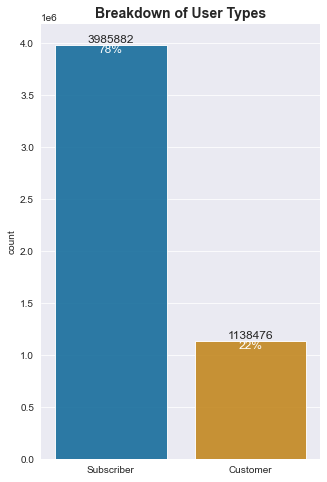

In [53]:
# Breakdown of user types

# Plotting 
fig, ax = plt.subplots(figsize = (5,8))

sns.countplot(x = "user_type", data = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, 
              order = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['user_type'].value_counts().index,
              palette = sns.color_palette('colorblind'), alpha=0.9)

# Percentage for each age-group
perc_list = []

# Calculate % for 2 user types 
type_sum = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['user_type'].value_counts().to_list()
total_sum = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.shape[0]

# arrange the % list in same as annotate loop order
for i in range(0,len(type_sum)):
    percent = int(round(100 * type_sum[i] / total_sum))
    perc_list.append(percent) 
    
# Annotate 
i=0
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="top", color='white', size=12)
    i+=1

# formatting
plt.title('Breakdown of User Types', weight='bold', size=14)
sns.despine(fig, left = True)
plt.xlabel("");

***Comment(s):*** In total subscribers hire nearly four times as many bikes as customers with 78% of the total bike hires.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As I completed a very thorough cleaning exercise I did not encounter any unusual points and therefore I did not need to perform any transformations .



#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did not find any unusual distributions, much of the findings is what I would expect for a city bike sharing scheme such as the most usuage occurring on weekdays and the most popular times for hiring.   As mentioned above my cleaning phase was extensive and the data by an large was relative;y well structured so I didn't need change the form of the data during he visualisation phase.

<a id='bivariate'></a>
### <font color ="purple"> BIVARIATE EXPLORATION

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

**Distance by user type**

Text(0.5, 1.0, 'Breakdown of User Types by Ride Distance (km)')

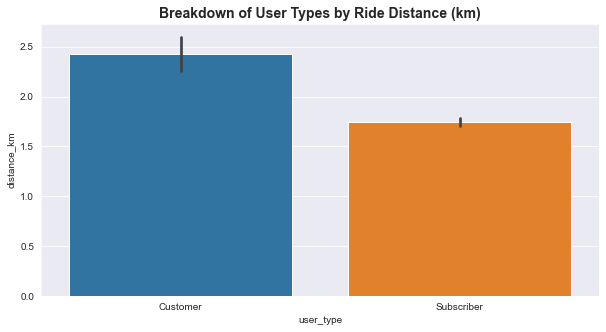

In [54]:
# returns breakdown of user type by distance
sns.barplot(x='user_type',  y='distance_km', data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5)
plt.title('Breakdown of User Types by Ride Distance (km)', weight='bold', size=14)

***Comment(s):*** Although there are far more subscribers hiring bikes when it comes to distance customers travel a further distance then subscribers.   In total they travel an average of just under 2.5 km which is more than than average 1.9 km total average.

**Breakdown of user types by ride duration**

Text(0.5, 1.0, 'Breakdown of User Types by Ride Duration (mins)')

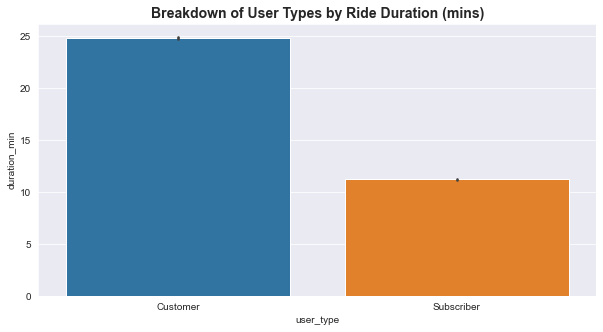

In [55]:
# returns breakdown of user type by duration
sns.barplot(x='user_type',  y='duration_min', data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5)
plt.title('Breakdown of User Types by Ride Duration (mins)', weight='bold', size=14)


***Comment(s):*** When it comes to the duration of rides it appears that customers spend twice as long on their rides than subscribers, this is not a surprise majority of subscribers will be commuters whereas customers are more leisure riders and go out for longer.

**Comparison of user types user type usage by month**

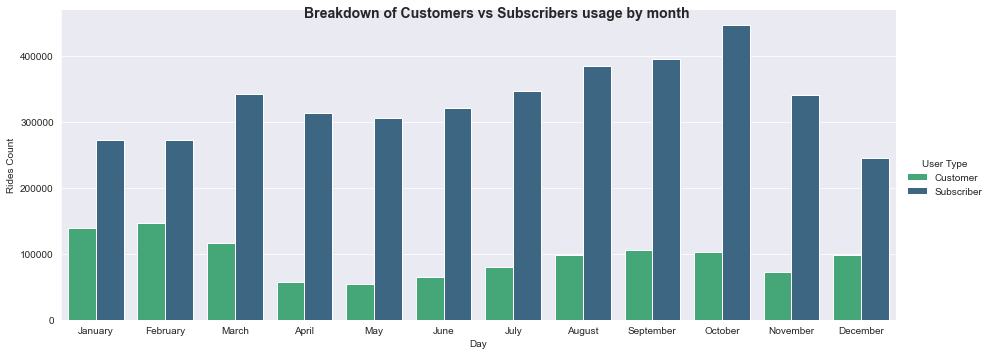

In [56]:
# returns breakdown of customers vs subsribers by month
g = sns.catplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='start_month', hue='user_type', kind='count',aspect=20.7/8.27, color=base_color,
                palette='viridis_r')

g.set_axis_labels('Day', 'Rides Count')
g._legend.set_title('User Type')
g.fig.suptitle('Breakdown of Customers vs Subscribers usage by month', fontsize=14, fontweight='bold');

***Comment(s):*** Subscribers have by far the greater amount of usage throughout the year with October seeing the most hires for subscribers whereas February saw the highest for customers.

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The features were pretty much what I expected and did not vary that much with other features of the dataset.  

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I found it interesting that customers in total travel further and longer than subscribers.

<a id='multivariate'></a>
### <font color ="purple"> MULTIVARIATE EXPLORATION

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

**Comparison of user types user type usage by distance**


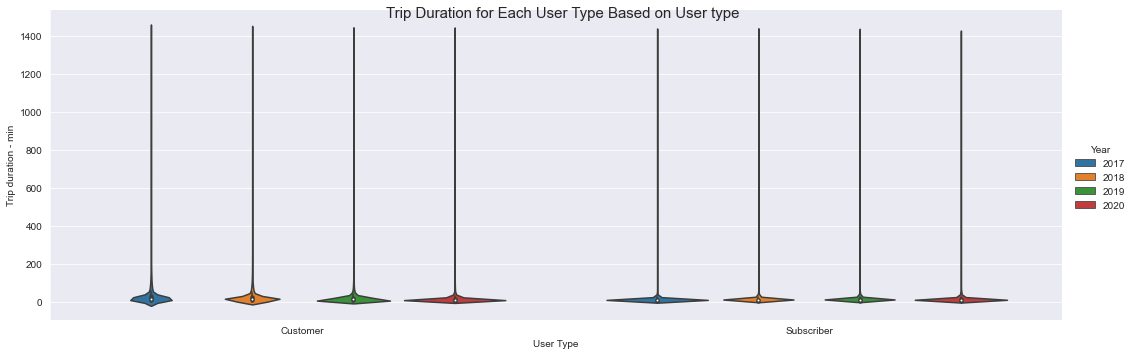

In [69]:
# returns breakdown of customer vs subsribers trip duration per year
ax = sns.catplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='user_type', y="duration_min", hue="year", kind="violin", height=5, aspect=3)

ax.set_axis_labels("User Type", "Trip duration (min)")
ax._legend.set_title('Year')
ax.fig.suptitle('Trip Duration for Each User Type Based on User type', fontweight='bold', fontsize=14);

***Comment(s):*** Comparing the the two user types you can see that subscribers are more consistent in the duration of their bike hires whilst customers vary slighlty more but they have a hire trip duration than subsribers in all four years.

<ul>
<li><a href="#home">Go to TOC </a></li>
</ul>   

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I struggled to plot more than one multivariate chart that would give me a good insight into relationships due to the fact that the dataset was not comprehensive enough in terms of correlations for multi variables.

#### Were there any interesting or surprising interactions between features?

> I did not encounter any surprising interactions between features.

<ul>
<li><a href="#home"> ...END...  go to beginning </a></li>
</ul>    